# *Dentella Deep Image Classifier Model* ♥️♥️



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Introduction...💕

In [2]:
# Differences among (AI & ML & NN & DL )

# AI (Artificial Intelligence) => ML (Machine Learning) => NN ( Neural Networks ) => DL (Deep Learning)

# This Model Is Image Classification Model ( AI ) with Deep Learning

# Different Uses Of ( ML , NN , DL )

# Uses Of ML :
        # Classification: Assigning categories to input data.
        # Regression: Predicting continuous values based on input data.
        # Clustering: Grouping similar data points together.
        # Recommendation systems: Providing personalized recommendations based on user preferences.
        # Natural Language Processing (NLP): Analyzing and understanding human language.
        # Computer vision: Processing and understanding visual data.

# Uses Of NN :
        #   Pattern recognition tasks.
        #   Image and speech recognition.
        #   Handwriting recognition.
        #   Time series prediction.
        #   Language translation.
        #   Game playing (e.g., AlphaGo).


# Uses Of DL :
        #   Image and object recognition (e.g., facial recognition, object detection).
        #   Speech recognition and synthesis.
        #   Natural language understanding and generation.
        #   Autonomous vehicles (e.g., self-driving cars).
        #   Drug discovery and genomics.
        #   Recommendation systems.
        #   Financial market analysis.
        #   Healthcare diagnostics.


# Why We Have Used Google Colab ?
# For Many Reasons :

         # Free GPU Access: Colab provides free access to GPU (Graphics Processing Unit) resources, which is valuable for training deep learning models that require substantial computational power.

         # Integration with Google Drive: Colab seamlessly integrates with Google Drive, allowing users to access, store, and share their notebooks and datasets directly from their Google Drive accounts.

         # Collaboration: Colab enables real-time collaboration, allowing multiple users to work on the same notebook simultaneously, similar to Google Docs.

         # Pre-installed Libraries: Colab comes with pre-installed popular libraries and packages commonly used in machine learning and data analysis, such as TensorFlow, PyTorch, and pandas, reducing the setup time for users.

         # Cloud-Based: Colab is cloud-based, which means users can access it from any device with an internet connection without the need for local installations or setup.

         # Jupyter Notebook Integration: Colab supports Jupyter notebooks, providing an interactive environment that allows users to write and execute code in a structured and visual manner.

         # Educational Resources: Colab provides educational resources, tutorials, and sample notebooks, making it suitable for both beginners and advanced users to learn and experiment with machine learning and data science concepts.

In [3]:
# Libraries We Have Used In Model

                # TensorFlow: TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem of tools, libraries, and community resources for building and deploying machine learning models.

                # os: The os module in Python provides a way to interact with the operating system. It is used for tasks such as navigating file directories, reading file names, and managing paths.

                # cv2 (OpenCV): OpenCV (Open Source Computer Vision Library) is a popular library for computer vision tasks. It provides functions for image and video processing, object detection, feature extraction, and more.

                # imghdr: The imghdr module in Python is used to determine the type of an image file based on its content. It is often used to validate image files before processing them.

                # matplotlib.pyplot: Matplotlib is a plotting library for Python. The pyplot module provides a MATLAB-like interface for creating plots, histograms, scatterplots, and other visualizations.

                # numpy: NumPy is a fundamental package for scientific computing with Python. It provides support for multi-dimensional arrays, matrices, mathematical functions, and random number generation, which are essential for numerical computations in machine learning.

                # tensorflow.keras: Keras is an open-source neural network library written in Python. It provides a high-level interface for building and training neural networks. In this case, TensorFlow's implementation of Keras is used for defining and training the neural network model.

1. Setup Dependencies and Load Data

1.1  Install Dependencies and Setup

In [4]:

!pip list # View All Packages & libraries

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [5]:
import tensorflow as tf
import keras

print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)


TensorFlow version:  2.16.1
Keras version:  3.3.3


In [6]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


In [7]:
import tensorflow as tf
import os                  # Call Libraries of Tannsorflow


In [8]:
gpus= tf.config.experimental.list_physical_devices('CPU') # Use Of All Avilable Devices

In [9]:
os.path.join('data','Clean') # Create Path

'data/Clean'

In [10]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [11]:
len(gpus)

1

In [12]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

1.2 Remove dodgy images

In [13]:
# Import Libraries
import cv2
import imghdr
from matplotlib import pyplot as plt

In [14]:
data_dir = 'data' # Find The Path

In [15]:
# Listing files in the 'Clean' directory
os.listdir(os.path.join(data_dir, 'Clean'))

['310.jpg',
 '085.jpg',
 '409.jpg',
 '804.jpg',
 '237.jpg',
 '389.jpg',
 '1163.jpg',
 '355.jpg',
 '1046.jpg',
 '1157.jpg',
 '1101.jpg',
 '383.jpg',
 '918.jpg',
 '714.jpg',
 '887.jpg',
 '680.jpg',
 '1060.jpg',
 '191.jpg',
 '957.jpg',
 '168.jpg',
 '164.jpg',
 '1134.jpg',
 '790.jpg',
 '328.jpg',
 '455.jpg',
 '1030.jpg',
 '670.jpg',
 '047.jpg',
 '143.jpg',
 '1106.jpg',
 '726.jpg',
 '753.jpg',
 '742.jpg',
 '640.jpg',
 '484.jpg',
 '012.jpg',
 '185.jpeg',
 '635.jpg',
 '267.jpg',
 '463.jpg',
 '1149.jpg',
 '486.jpg',
 '223.jpg',
 '573.jpg',
 '142.jpg',
 '014.jpg',
 '944.jpg',
 '1032.jpg',
 '1057.jpg',
 '304.jpg',
 '809.jpg',
 '516.jpeg',
 '915.jpg',
 '336.jpg',
 '571.jpg',
 '165.jpg',
 '802.jpg',
 '587.jpg',
 '241.jpg',
 '734.jpg',
 '872.jpg',
 '1065.jpg',
 '024.jpeg',
 '1109.jpg',
 '743.jpg',
 '766.jpg',
 '242.jpg',
 '697.jpg',
 '521.jpg',
 '1007.jpg',
 '431.jpg',
 '494.jpg',
 '539.jpg',
 '402.jpg',
 '1147.jpg',
 '1077.jpg',
 '368.jpg',
 '946.jpg',
 '776.jpg',
 '832.jpg',
 '399.jpg',
 '717.jpg

In [16]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] # The Correct Path of images

In [17]:
image_exts[1] # The Index Of Image

'jpg'

In [18]:
for image_class in os.listdir(data_dir):
  print(image_class)

Caries
Clean


In [19]:
img = cv2.imread(os.path.join('data' , 'Clean' , '220.jpg'))

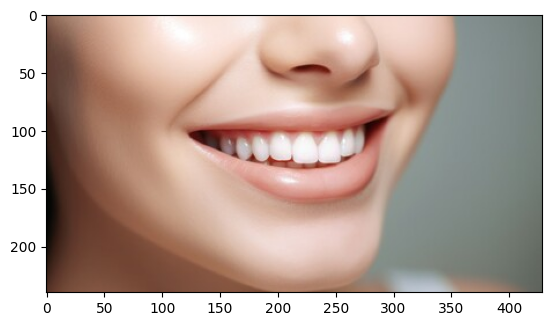

In [20]:
import cv2

# Load the image
cv2.imread(os.path.join('data' , 'Clean' , '220.jpg'))

# Check if the image is loaded successfully
if img is None:
    print("Error: Unable to load the image.")
else:
    # Convert the color space and display the image
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()


In [21]:
# Check The Content of Folder and is it suitable or not
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/Caries/651.jpg
Image not in ext list data/Clean/383.jpg


1.3 Load Data

In [22]:
# Import Librarries
import numpy as np
from matplotlib import pyplot as plt

In [23]:
data = tf.keras.utils.image_dataset_from_directory('data') # Define The Path

Found 2375 files belonging to 2 classes.


In [24]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
data_iterator = data.as_numpy_iterator() # assign Path to another path

In [26]:
batch = data_iterator.next()

In [27]:
batch[0].shape

(32, 256, 256, 3)

In [28]:
# Geet another batch from the iterator
batch = data_iterator.next()

In [29]:
# Image Reppresented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [30]:
batch[1]

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

In [31]:
# Class 1 = Clean Teeth
# Class 0 = Caries Teeth
batch[1]

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

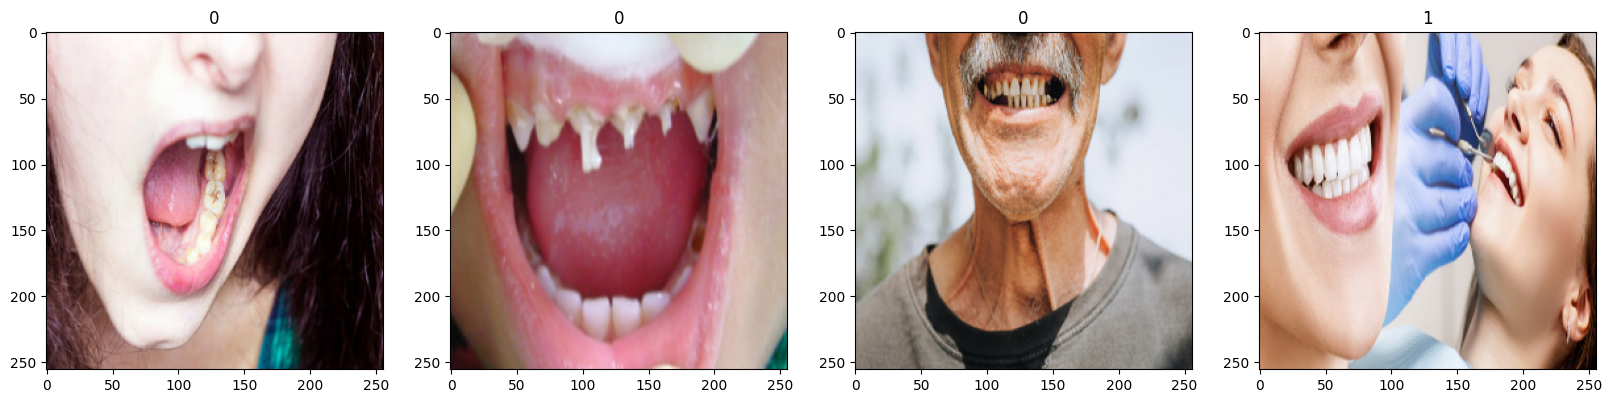

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [33]:
scaled = batch[0] / 255

In [34]:
scaled.min()

0.0

2. Preprocess Data

2.1 Scale Data

In [35]:
data = data.map(lambda x,y: (x/255, y))

In [36]:
scaled_iterator = data.as_numpy_iterator()

In [37]:
batch = scaled_iterator.next()

In [38]:
batch[0].max()

1.0

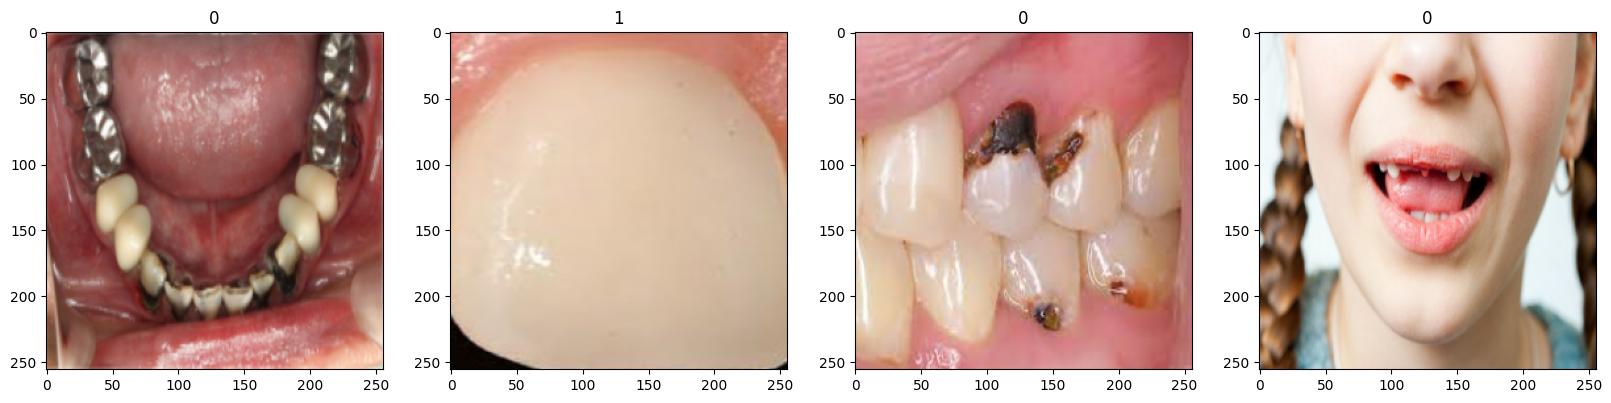

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [40]:
len(data)

75

In [41]:
# Determine The Size Of Training Data
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)+1
test_size = int(len(data)*.1)


In [42]:
train_size+val_size+test_size

75

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [44]:
len(test)

7

3. Deep Model

3.1 Build Deep Learning Model

In [45]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [46]:
# import the necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()   # initializes an empty sequential model

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Compiling the model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
model.summary() # provides a textual summary of the model architecture

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,861,361 (7.10 MB)

 Trainable params: 1,861,361 (7.10 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [51]:
logdir='logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 157ms/step - accuracy: 0.6061 - loss: 0.6970 - val_accuracy: 0.5039 - val_loss: 0.6650
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - accuracy: 0.6842 - loss: 0.5805 - val_accuracy: 0.6172 - val_loss: 0.6983
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.7539 - loss: 0.5129 - val_accuracy: 0.8047 - val_loss: 0.4713
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.8123 - loss: 0.4331 - val_accuracy: 0.8164 - val_loss: 0.4375
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.8095 - loss: 0.3985 - val_accuracy: 0.8203 - val_loss: 0.3535
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8899 - loss: 0.2803 - val_accuracy: 0.8477 - val_loss: 0.4195
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.8670 - loss: 0.3297 - val_accuracy: 0.8945 - val_loss: 0.3449
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9109 - loss: 0.2187 - val_accuracy: 0.

In [54]:
hist.history # contains information about the training process.

{'accuracy': [0.6432291865348816,
  0.7119791507720947,
  0.7520833611488342,
  0.8286458253860474,
  0.8458333611488342,
  0.8921874761581421,
  0.8776041865348816,
  0.9244791865348816,
  0.953125,
  0.9708333611488342,
  0.9755208492279053,
  0.9942708611488342,
  0.987500011920929,
  0.9947916865348816,
  0.9963541626930237,
  0.9963541626930237,
  0.9786458611488342,
  0.9833333492279053,
  0.9927083253860474,
  0.9921875],
 'loss': [0.6573028564453125,
  0.5558013319969177,
  0.5022192597389221,
  0.40744492411613464,
  0.3588985502719879,
  0.27905210852622986,
  0.3089200556278229,
  0.19010606408119202,
  0.12555243074893951,
  0.10382355749607086,
  0.0752769261598587,
  0.02934945747256279,
  0.04298119619488716,
  0.018865203484892845,
  0.015075476840138435,
  0.012793813832104206,
  0.05975893884897232,
  0.044206660240888596,
  0.01597757451236248,
  0.027096692472696304],
 'val_accuracy': [0.50390625,
  0.6171875,
  0.8046875,
  0.81640625,
  0.8203125,
  0.84765625,
  

3.3 Plot Performance

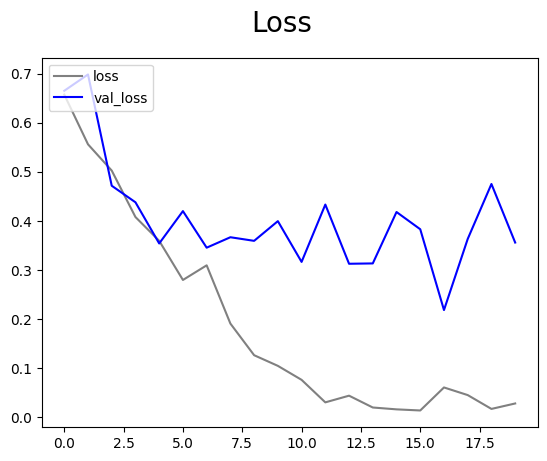

In [55]:
# plot to visualize the training and validation loss over epochs

fig = plt.figure()
plt.plot(hist.history['loss'], color='gray', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

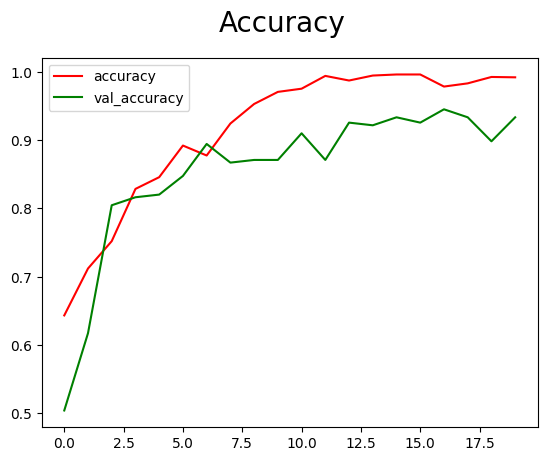

In [56]:
# plot to visualize the training and validation accuracy over epochs

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

4. Evaluate Performance

4.1 Evaluate Testing

In [57]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [58]:
#evaluating binary classification models

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [59]:
len(test)

7

In [60]:
#  iterating over a test dataset using test.as_numpy_iterator()
# and making predictions with your model on each batch.

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


In [61]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8823529481887817, Recall: 0.8910890817642212, Accuracy: 0.8844221234321594


In [62]:
!pip install tabulate

╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Precision │ 0.882353 │
├───────────┼──────────┤
│ Recall    │ 0.891089 │
├───────────┼──────────┤
│ Accuracy  │ 0.884422 │
╘═══════════╧══════════╛


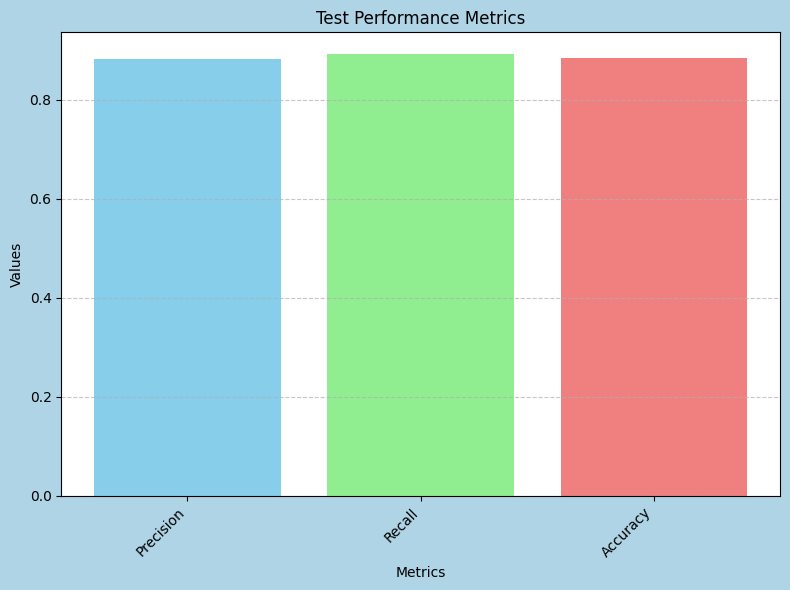

In [63]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Assuming pre, re, and acc are variables containing precision, recall, and accuracy values
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()

# Create a list of lists containing the data to display in the table
table_data = [
    ["Precision", precision],
    ["Recall", recall],
    ["Accuracy", accuracy]
]

# Display the table with borders and a stylish appearance using tabulate
table_str = tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid")

# Print the table
print(table_str)

# Convert the table data to lists for plotting
metrics = [row[0] for row in table_data]
values = [row[1] for row in table_data]

# Plot the values as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Test Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gcf().set_facecolor('#AED4E6')
plt.show()


4.2 Evaluate Training

In [64]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import numpy as np


In [65]:
train_pre = Precision()
train_re = Recall()
train_acc = BinaryAccuracy()


In [66]:
for batch in train.as_numpy_iterator():
    X, y = batch
    # Resize the images to the expected input shape of the model
    X_resized = tf.image.resize(X, [256, 256])
    yhat = model.predict(X_resized)
    train_pre.update_state(y, yhat)
    train_re.update_state(y, yhat)
    train_acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━

In [67]:
len(train)

60

In [68]:
train_precision_value = train_pre.result().numpy()
train_recall_value = train_re.result().numpy()
train_accuracy_value = train_acc.result().numpy()

print(f'Train Precision: {train_precision_value}')
print(f'Train Recall: {train_recall_value}')
print(f'Train Accuracy: {train_accuracy_value}')


Train Precision: 0.9989429116249084
Train Recall: 0.9905660152435303
Train Accuracy: 0.9947916865348816


╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Precision │ 0.998943 │
├───────────┼──────────┤
│ Recall    │ 0.990566 │
├───────────┼──────────┤
│ Accuracy  │ 0.994792 │
╘═══════════╧══════════╛


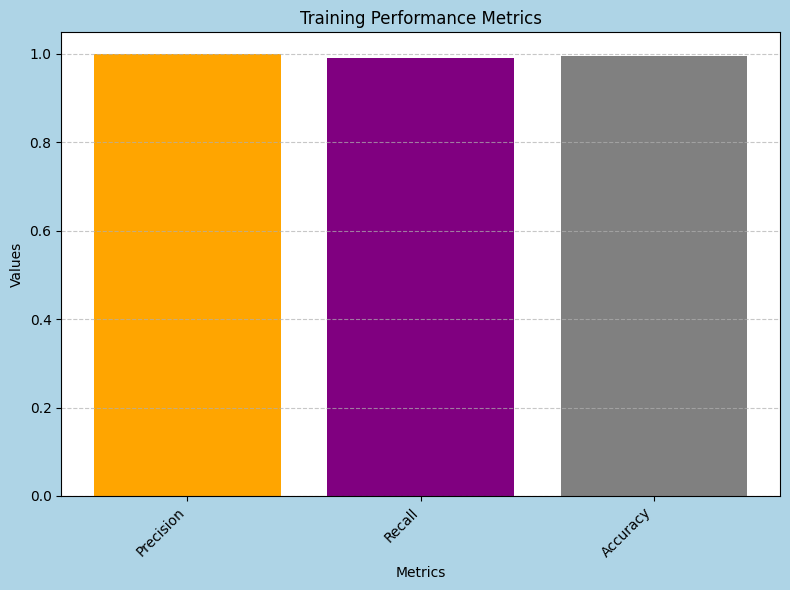

In [69]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Calculate precision, recall, and accuracy for the training data
train_precision_value = train_pre.result().numpy()
train_recall_value = train_re.result().numpy()
train_accuracy_value = train_acc.result().numpy()

# Create a list of lists containing the data to display in the table
table_data = [
    ["Precision", train_precision_value],
    ["Recall", train_recall_value],
    ["Accuracy", train_accuracy_value]
]

# Display the table with borders and a stylish appearance using tabulate
table_str = tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid")

# Print the table
print(table_str)

# Convert the table data to lists for plotting
metrics = [row[0] for row in table_data]
values = [row[1] for row in table_data]

# Plot the values as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['orange', 'purple', 'gray'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Training Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gcf().set_facecolor('#AED4E6')
plt.show()


4.3 Data Sources

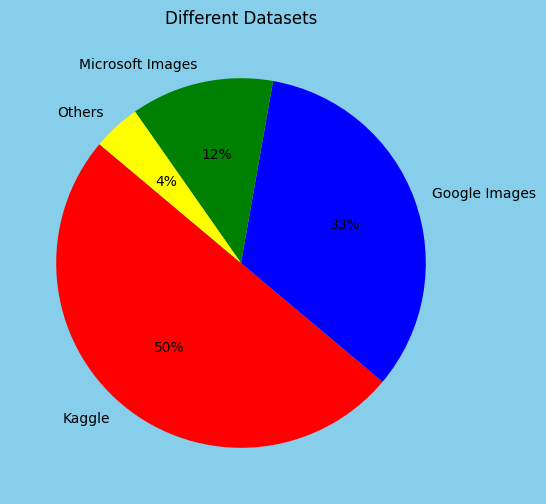

In [70]:
import matplotlib.pyplot as plt

# Define the datasets and their corresponding numbers
datasets = ['Kaggle', 'Google Images', 'Microsoft Images', 'Others']
num_datasets = [1200, 800, 300, 100]  # Replace these values with your actual dataset numbers

# Create a pie chart with a sky blue background
fig, ax = plt.subplots(figsize=(10, 6), facecolor='skyblue')  # Set the face color to sky blue
ax.pie(num_datasets, labels=datasets, autopct='%1.0f%%', startangle=140, colors=['red', 'blue', 'green', 'yellow'])

# Add a title
plt.title('Different Datasets')

# Show the pie chart
plt.show()


<ipython-input-71-3bb3afe2e263>:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


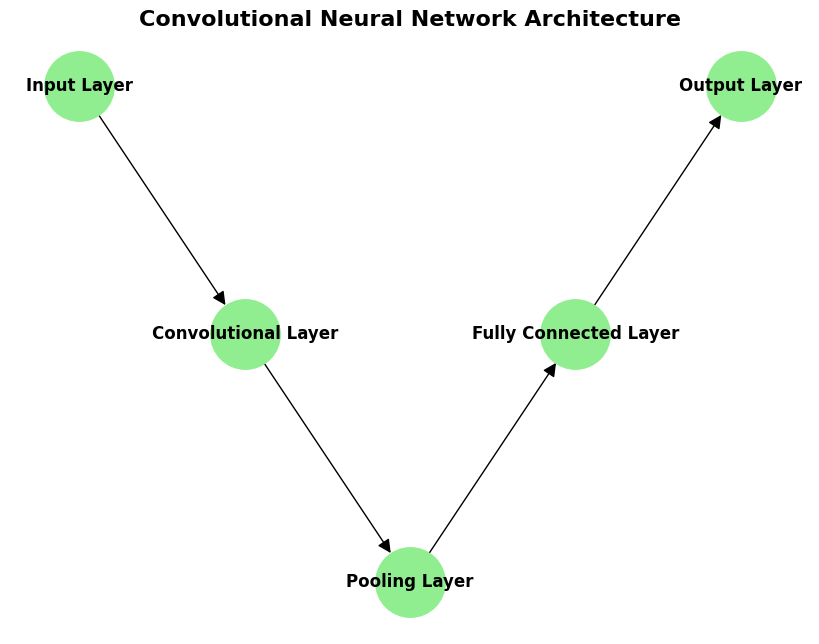

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph object
G = nx.DiGraph()

# Define the layers of the CNN
layers = ['Input Layer', 'Convolutional Layer', 'Pooling Layer', 'Fully Connected Layer', 'Output Layer']

# Define the connections between layers
connections = [('Input Layer', 'Convolutional Layer'),
               ('Convolutional Layer', 'Pooling Layer'),
               ('Pooling Layer', 'Fully Connected Layer'),
               ('Fully Connected Layer', 'Output Layer')]

# Add nodes to the graph
for layer in layers:
    G.add_node(layer)

# Add edges to the graph
for connection in connections:
    G.add_edge(connection[0], connection[1])

# Set positions for the nodes
pos = {
    'Input Layer': (0, 3),
    'Convolutional Layer': (1, 2),
    'Pooling Layer': (2, 1),
    'Fully Connected Layer': (3, 2),
    'Output Layer': (4, 3)
}

# Draw the graph
plt.figure(figsize=(8, 6), facecolor='lightblue')
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightgreen', font_size=12, font_weight='bold', arrowsize=20)
plt.title('Convolutional Neural Network Architecture', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


4.4 Auc & Rock_curve

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 1901 images belonging to 2 classes.
Found 474 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 97s 991ms/step - accuracy: 0.5569 - loss: 7.1083 - val_accuracy: 0.6772 - val_loss: 5.8915
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 361ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 499ms/step


Train - Precision: 0.5100806451612904, Recall: 0.2680084745762712, Accuracy: 0.5086796422935297, AUC: 0.5012331084072756
Validation - Precision: 0.49612403100775193, Recall: 0.2723404255319149, Accuracy: 0.5021097046413502, AUC: 0.4844921214279355


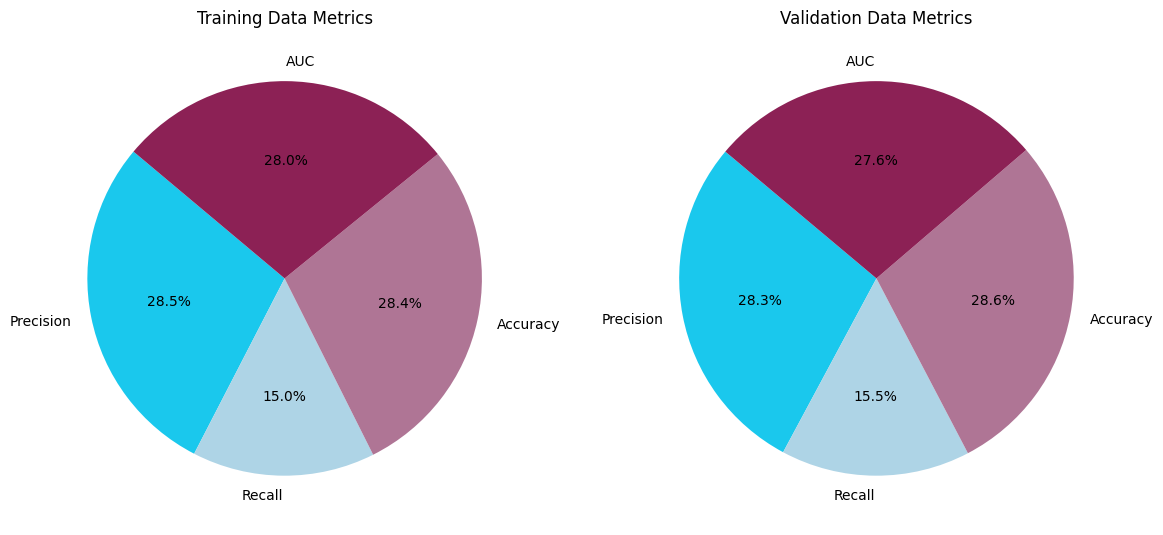

In [72]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Enable mixed precision training
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for your specific task with regularization and dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # For binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Load and preprocess your dataset
data_dir = '/content/data'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with the new dataset
model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator
)

# Evaluate the model on training data in batches
train_predictions = model.predict(train_generator, verbose=1)
train_predictions_binary = (train_predictions > 0.5).astype(int).flatten()
train_true_labels = train_generator.classes

train_precision = precision_score(train_true_labels, train_predictions_binary)
train_recall = recall_score(train_true_labels, train_predictions_binary)
train_accuracy = accuracy_score(train_true_labels, train_predictions_binary)
train_auc = roc_auc_score(train_true_labels, train_predictions)

# Evaluate the model on validation data in batches
val_predictions = model.predict(validation_generator, verbose=1)
val_predictions_binary = (val_predictions > 0.5).astype(int).flatten()
val_true_labels = validation_generator.classes

val_precision = precision_score(val_true_labels, val_predictions_binary)
val_recall = recall_score(val_true_labels, val_predictions_binary)
val_accuracy = accuracy_score(val_true_labels, val_predictions_binary)
val_auc = roc_auc_score(val_true_labels, val_predictions)

# Print the evaluation results
print(f'Train - Precision: {train_precision}, Recall: {train_recall}, Accuracy: {train_accuracy}, AUC: {train_auc}')
print(f'Validation - Precision: {val_precision}, Recall: {val_recall}, Accuracy: {val_accuracy}, AUC: {val_auc}')

# Save the model in the recommended format
model.save('models/imageclassifier.h5')

# Visualize the results with a pie chart
# Data for pie chart
metrics = ['Precision', 'Recall', 'Accuracy', 'AUC']
train_values = [train_precision, train_recall, train_accuracy, train_auc]
val_values = [val_precision, val_recall, val_accuracy, val_auc]

# Colors for pie chart
colors = ['#1AC8ED', '#AED4E6', '#AF7595', '#8C2155']

# Plot pie chart for training data
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie(train_values, labels=metrics, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Training Data Metrics')

# Plot pie chart for validation data
plt.subplot(1, 2, 2)
plt.pie(val_values, labels=metrics, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Validation Data Metrics')
plt.show()


5. Test

In [73]:
# imported the OpenCV library in Python
import cv2

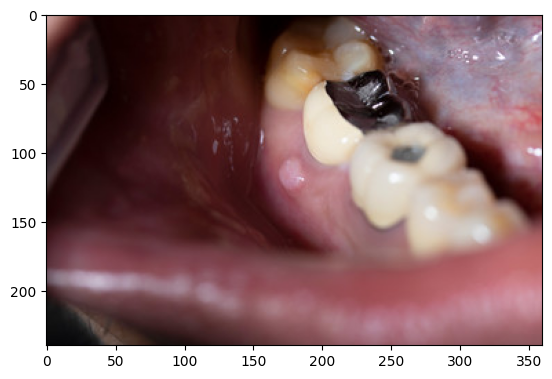

In [74]:
# read an image file and then using Matplotlib (plt) to display the image.

img = cv2.imread('bad_05.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

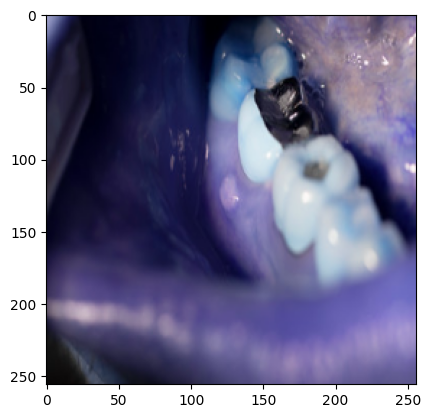

In [75]:
# resize an image (img) to a new size (256x256)

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [76]:
resize.shape

TensorShape([256, 256, 3])

In [77]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [78]:
import numpy as np
import tensorflow as tf

# Assuming 'resize' is the image you want to predict on
resize_to = 224  # the expected input size for the model

# Resize the image to (224, 224)
resized_image = tf.image.resize(resize, (resize_to, resize_to))

# Normalize the image
normalized_image = resized_image / 255.0

# Expand dimensions to match the expected input shape for the model
input_image = np.expand_dims(normalized_image, axis=0)

# Obtain predictions from the trained model
yhat = model.predict(input_image)

# Output the predictions
print(yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.3833]]


In [79]:
yhat   # Calculate the value of prediction

array([[0.3833]], dtype=float16)

In [80]:
# If yhat is greater than 0.5, the model predicts that the teeth are good.
# If yhat is 0.5 or less, the model predicts that the teeth are bad.

if yhat > 0.5:
    print(f'Predicted your Teeth are Good & You dont need to visit doctor')
else:
    print(f'Predicted your Teeth are Bad & You need to visit doctor')

Predicted your Teeth are Bad & You need to visit doctor


6. Save The Model

6.1 Save The Model

In [81]:
from tensorflow.keras.models import load_model

In [82]:
import os
from tensorflow.keras.models import load_model

# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

model.save(os.path.join('models', 'imageclassifier.h5')) # Save the model

In [83]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

7. Deploy Model

In [84]:
!pip install transformers

In [85]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.2 MB/s

In [87]:
import subprocess

# Define the list of libraries to install
libraries = [
    'gradio',
    'tensorflow',
    'numpy',
    'Pillow',
    'opencv-python-headless',
    'Flask'  # Add Flask here
]

# Install each library using pip
for library in libraries:
    try:
        subprocess.check_call(['pip', 'install', library])
    except subprocess.CalledProcessError as e:
        print(f"Error installing {library}: {e}")

import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image
import io

# Load the pre-trained TensorFlow model
model = tf.keras.models.load_model("/content/models/imageclassifier.h5")

# Define the function to predict the teeth health
def predict_teeth_health(image):
    # Convert the PIL image object to a file-like object
    image_bytes = io.BytesIO()
    image.save(image_bytes, format="JPEG")

    # Load the image from the file-like object
    image = tf.keras.preprocessing.image.load_img(image_bytes, target_size=(224, 224))  # Adjust target_size if needed
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # Make a prediction
    prediction = model.predict(image)

    # Get the probability of being 'Good'
    probability_good = prediction[0][0]  # Assuming it's a binary classification

    # Define the prediction result
    result = {
        "prediction": "Your Teeth are Good & You Don't Need To Visit Doctor" if probability_good > 0.5 else "Your Teeth are Bad & You Need To Visit Doctor"
    }

    return result

# Define the Gradio interface
iface = gr.Interface(
    fn=predict_teeth_health,
    inputs=gr.Image(type="pil"),
    outputs="json",
    title="<h1 style='color: lightgreen; text-align: center;'>Dentella</h1><p style='text-align: center; color: skyblue; font-size: 30px;'>Please Enter Your Teeth Here...</p>",
)

# Deploy the Gradio interface using Gradio's hosting service
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d44fe6b288c217bdb5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


8. Save Model in ".onnx" format

In [88]:
pip install tf2onnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 30.9 MB/s eta 0:00:00


In [91]:
import tensorflow as tf
import tf2onnx

# Load the pre-trained TensorFlow model
model = tf.keras.models.load_model("/content/models/imageclassifier.h5")

# Check the input shape of the model
input_shape = model.input.shape
print(f"Model input shape: {input_shape}")

# Adjust the TensorSpec to match the model's expected input shape
spec = (tf.TensorSpec((None, 224, 224, 3), tf.float32, name="input"),)  # Change to the correct input shape
output_path = "imageclassifier.onnx"

# Convert the TensorFlow model to ONNX format
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13)
with open(output_path, "wb") as f:
    f.write(model_proto.SerializeToString())

print(f"Model has been converted and saved to {output_path}")


Model input shape: (None, 224, 224, 3)


Model has been converted and saved to imageclassifier.onnx


# End...💕
